<a href="https://colab.research.google.com/github/firman-hoerulloh/Python_Rock-Paper-Scissors-Classification/blob/main/Rock_Paper_Scissors_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Firman Hoerulloh

# Rock-Paper-Scissors Classification

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9596156bdbe661f699bed49859dbf9da55b0b65d9d3ec5a593c726ebc868ffc6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [47]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import zipfile
import os
import wget
import shutil
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing import image

In [48]:
# Unduh dataset
url = 'https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
wget.download(url)

'rockpaperscissors (2).zip'

In [49]:
# Ekstrak dataset
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [50]:
# Tentukan direktori dataset
base_dir = 'rockpaperscissors/rps-cv-images'

In [51]:
# Hapus direktori yang tidak perlu jika ada
if os.path.exists(os.path.join(base_dir, 'README_rpc-cv-images.txt')):
    os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [52]:
# Pastikan hanya ada tiga sub-direktori: 'rock', 'paper', 'scissors'
classes = ['rock', 'paper', 'scissors']
for item in os.listdir(base_dir):
    if item not in classes:
        shutil.rmtree(os.path.join(base_dir, item))

In [53]:
# Persiapan DataGenerator dengan augmentasi gambar
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.4,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [54]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1314 images belonging to 3 classes.


In [55]:
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 874 images belonging to 3 classes.


In [56]:
# Cetak urutan kelas dari generator
print("Class indices from train_generator: ", train_generator.class_indices)
print("Class indices from validation_generator: ", validation_generator.class_indices)

Class indices from train_generator:  {'paper': 0, 'rock': 1, 'scissors': 2}
Class indices from validation_generator:  {'paper': 0, 'rock': 1, 'scissors': 2}


In [57]:
# Pastikan urutan class_names sesuai dengan urutan label dari generator
class_names = list(train_generator.class_indices.keys())
print("Class names: ", class_names)

Class names:  ['paper', 'rock', 'scissors']


In [59]:
# Bangun model sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [60]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [61]:
# Gunakan EarlyStopping untuk menghentikan pelatihan jika tidak ada perbaikan
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [62]:
# Latih model dengan jumlah epoch yang dikurangi dan EarlyStopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15,
    callbacks=[early_stopping]
)

Epoch 1/15
41/41 [==============================] - 87s 2s/step - loss: 1.4134 - accuracy: 0.3713 - val_loss: 1.0728 - val_accuracy: 0.3958
Epoch 2/15
41/41 [==============================] - 81s 2s/step - loss: 1.0258 - accuracy: 0.4727 - val_loss: 1.0623 - val_accuracy: 0.4676
Epoch 3/15
41/41 [==============================] - 83s 2s/step - loss: 0.9951 - accuracy: 0.5226 - val_loss: 0.9154 - val_accuracy: 0.6053
Epoch 4/15
41/41 [==============================] - 83s 2s/step - loss: 0.9795 - accuracy: 0.5218 - val_loss: 0.8694 - val_accuracy: 0.6285
Epoch 5/15
41/41 [==============================] - 85s 2s/step - loss: 0.9049 - accuracy: 0.5842 - val_loss: 0.8529 - val_accuracy: 0.6458
Epoch 6/15
41/41 [==============================] - 84s 2s/step - loss: 0.8170 - accuracy: 0.6264 - val_loss: 0.7420 - val_accuracy: 0.7060
Epoch 7/15
41/41 [==============================] - 83s 2s/step - loss: 0.7510 - accuracy: 0.6997 - val_loss: 0.5901 - val_accuracy: 0.7766
Epoch 8/15
41/41 [==

In [63]:
# Evaluasi akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [64]:
epochs = range(len(acc))

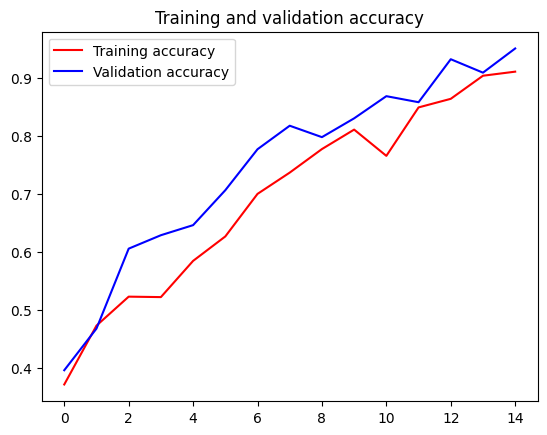

<Figure size 640x480 with 0 Axes>

In [65]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [84]:
# Unggah / Upload Gambar
uploaded = files.upload()

Saving kertas.png to kertas.png


1/1 [==============================] - 0s 41ms/step


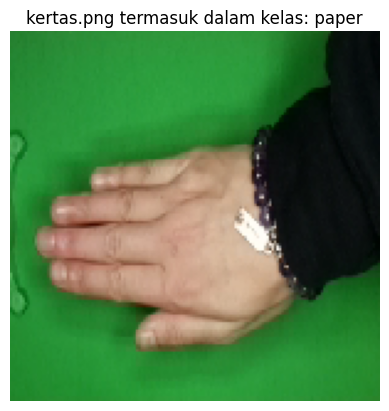

In [85]:
# Prediksi gambar yang diunggah
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_class = class_names[np.argmax(classes)]

    # Tampilkan gambar
    plt.imshow(img)
    plt.title(f"{fn} termasuk dalam kelas: {predicted_class}")
    plt.axis('off')
    plt.show()